# Relatório - Sequência de Testes

__Autor__: Renan Santos Mendes

__Objetivo__: realizar teste nas reduções de dimensionalidade e comparar os resultados com o problema sendo resolvido no espaço de objetivos original em $\mathbb{R}^8$, além de comparar com a versão online O espaço de objetivos reduzido considerado nesses testes foi em $\mathbb{R}^3$. O algoritmo utilizado em todos os casos foi o MOEAD e o para calcular a similaridade entre as funções foi utilizado o $\tau$ de Kendall.

__Metodologia__:
- Foram utilizadas duas formulações para o problema no espaço de objetivos: 
    - (1) usando agregação 
    - (2) escolhendo um objetivo
- A métrica utilizada para comparação foi o hipervolume
- Para cada formulação o MOEAD foi executado 10 vezes com 30.000 avaliações de função objetivo
- Inicialmente são apresentadas as formulações e as curvas de convergência média para cada formulação, em $\mathbb{R}^3$ e depois em $\mathbb{R}^8$
- Em seguida, é apresentada a curva de convergência para o MOEAD executado no espaço de objetivos original, ou seja, em $\mathbb{R}^8$
- As convergências médias em $\mathbb{R}^8$ para as formulações com agregação, escolha e para o MOEAD em $\mathbb{R}^8$ são apresentadas
- Logo após, é apresentado a curva de convergência em $\mathbb{R}^8$ para o MOEAD-online
- As convergências dos 4 algoritmos são plotadas
- É aplicado o teste de aleatoriedade para comparar os Paretos encontrados após as 10 para cada algoritmo

__Observação__: Os testes foram divididos em duas partes:
- Parte 1: Comparação dos algoritmos em $\mathbb{R}^8$ - os resultados de cada algoritmo foram comparados no espaço de objetivos original
- Parte 2: Comparação dos algoritmos em $\mathbb{R}^3$ - os resultados de cada algoritmo foram comparados no espaço de objetivos reduzido

# Import das bibliotecas e funções utilizadas

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
from pygmo import *
from mpl_toolkits.mplot3d import Axes3D
import methods as mt
%matplotlib inline

# PARTE 1 - Comparação dos algoritmos em $\mathbb{R}^8$

## Convergência do HV em $\mathbb{R}^3$ para MOEAD com agregação de Funções Objetivo

- Formulação utilizada
$$F_1 = f_1 + f_4 + f_7 + f_8 \\ F_2 = f_2 + f_5 \\ F_3 = f_3 + f_6$$

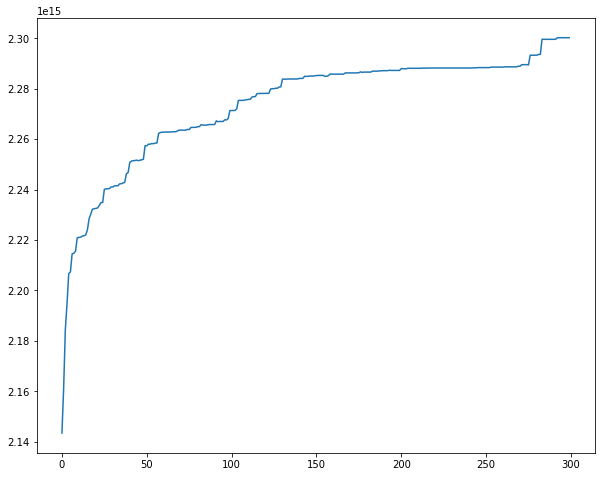

In [2]:
file = 'moead-reduced-pareto-execution-'
folder = 'MOEAD_R3_CA'
hv_moead_agr_R3, hv_moead_agr_R3_df = mt.plot_hypervolume_convergence(folder, file, 3)

## Convergência do HV em $\mathbb{R}^8$ para MOEAD com agregação de Funções Objetivo

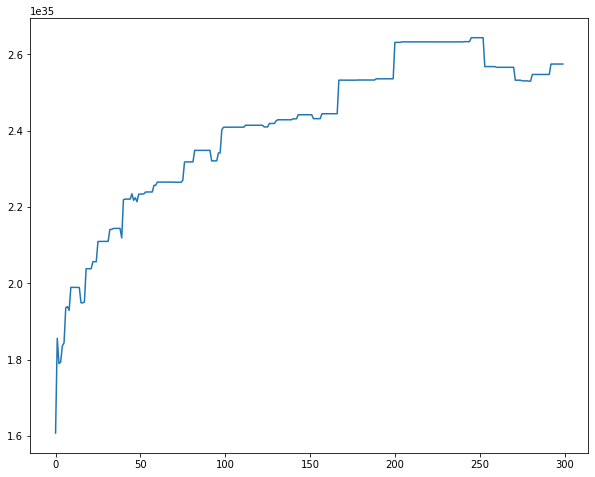

In [3]:
file = 'moead-original-pareto-execution-'
folder = 'MOEAD_R3_CA'
hv_moead_agr_R8, hv_moead_agr_R8_df = mt.plot_hypervolume_convergence(folder, file, 8)

 - Vale ressaltar que a atualização do arquivo externo é feita com base no espaço em $\mathbb{R}^3$ o que pode causar o comportamento não monotônico da curva de convergência média do hipervolume

## Convergência do HV em $\mathbb{R}^3$ para MOEAD com escolha de Funções Objetivo

- Formulação utilizada
$$F_1 = f_1 \\ F_2 = f_5 \\ F_3 = f_3 $$

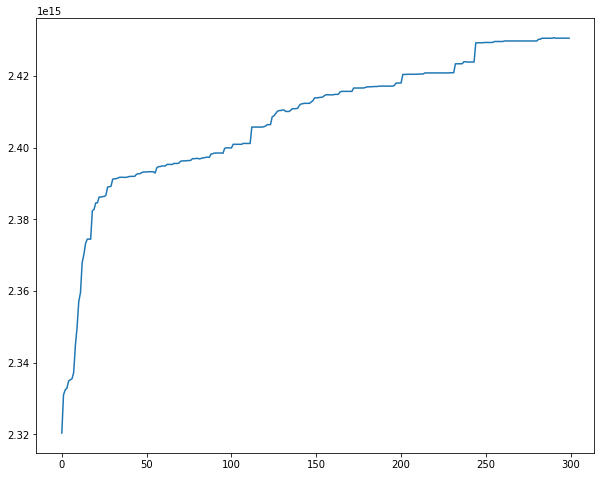

In [4]:
file = 'moead-reduced-pareto-execution-'
folder = 'MOEAD_R3_SA'
hv_moead_esc_R3, hv_moead_esc_R3_df = mt.plot_hypervolume_convergence(folder, file, 3)

## Convergência do HV em $\mathbb{R}^8$ para MOEAD com escolha de Funções Objetivo

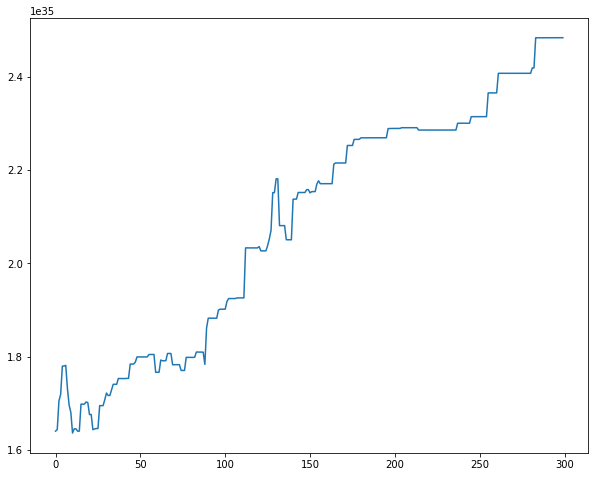

In [5]:
file = 'moead-original-pareto-execution-'
folder = 'MOEAD_R3_SA'
hv_moead_esc_R8, hv_moead_esc_R8_df = mt.plot_hypervolume_convergence(folder, file, 8)

## Convergência do HV em $\mathbb{R}^3$ para MOEAD-online

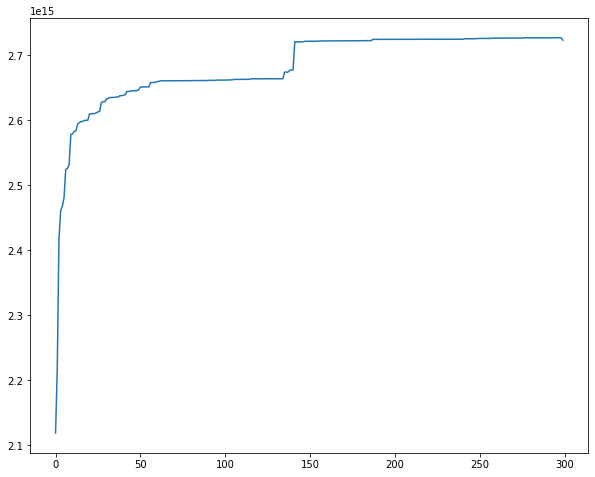

In [6]:
file = 'onmoead-reduced-pareto-execution-'
folder = 'ONMOEAD'
hv_moead_online_R3, hv_moead_online_R3_df = mt.plot_hypervolume_convergence(folder, file, 3)

## Convergência do HV em $\mathbb{R}^8$ para MOEAD-online

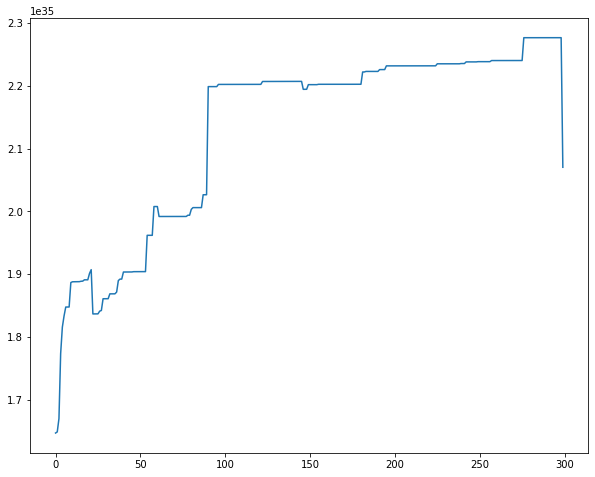

In [7]:
file = 'onmoead-original-pareto-execution-'
folder = 'ONMOEAD'
hv_moead_online_R8, hv_moead_online_R8_df = mt.plot_hypervolume_convergence(folder, file, 8)

## Convergência do HV em $\mathbb{R}^8$ para o MOEAD

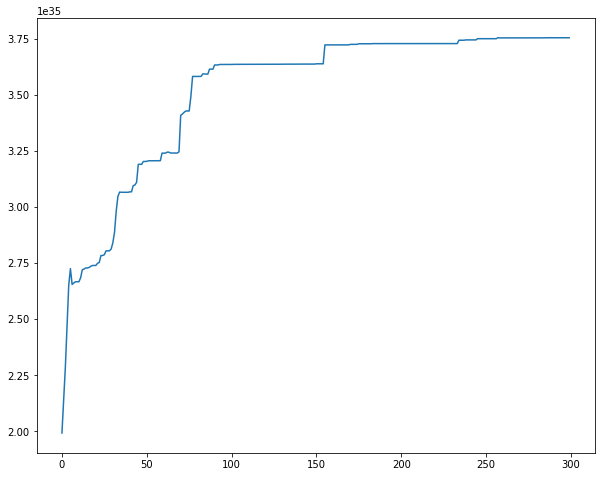

In [8]:
file = 'moead-reduced-pareto-execution-'
folder = 'MOEAD_R8'
hv_moead_R8, hv_moead_R8_df = mt.plot_hypervolume_convergence(folder, file, 8)

## Convergências de HV em $\mathbb{R}^8$

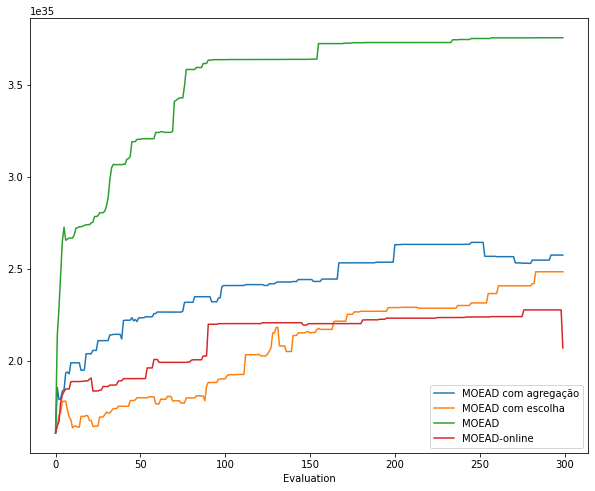

In [9]:
hv_moead_agr_R8[0] = 1.6081469550308707e+35
hv_moead_esc_R8[0] = 1.6081469550308707e+35
hv_moead_R8[0] = 1.6081469550308707e+35
hv_moead_online_R8[0] = 1.6081469550308707e+35
plt.figure(figsize=(10,8))
plt.plot(hv_moead_agr_R8, label = "MOEAD com agregação")
plt.plot(hv_moead_esc_R8, label = "MOEAD com escolha")
plt.plot(hv_moead_R8, label = "MOEAD")
plt.plot(hv_moead_online_R8, label = "MOEAD-online")
plt.xlabel('Evaluation')
plt.legend()
plt.show()

 - Com base na curva de convergência média em $\mathbb{R}^8$, é possível ver que o MOEAD sendo executado no espaço de objetivos original apresenta melhor resultado (em termos de hipervolume)
 - Abaixo segue os boxplots para o hipervolume em $\mathbb{R}^8$ de cada algoritmos

## Boxplots para o Hipervolume em $\mathbb{R}^8$

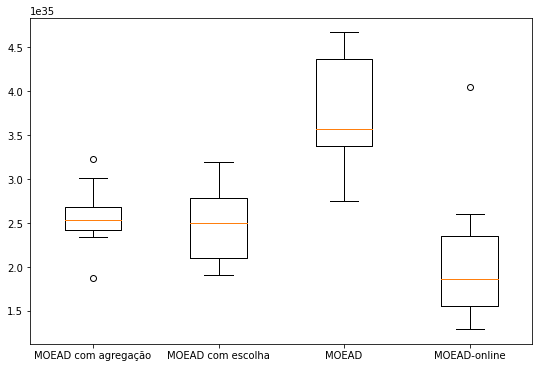

In [10]:
data_to_plot = [hv_moead_agr_R8_df.iloc[299:].values.tolist()[0],
                hv_moead_esc_R8_df.iloc[299:].values.tolist()[0],
                hv_moead_R8_df.iloc[299:].values.tolist()[0],
                hv_moead_online_R8_df.iloc[299:].values.tolist()[0]]
plt.figure(figsize=(9, 6))
plt.boxplot(data_to_plot, labels=["MOEAD com agregação",
                                  "MOEAD com escolha",
                                  "MOEAD",
                                  "MOEAD-online"])
plt.show()

## Teste de Aleatoriedade

### MOEAD com agregação X MOEAD com escolha

In [11]:
mt.random_test(hv_moead_agr_R8_df.iloc[299:], hv_moead_esc_R8_df.iloc[299:], 10, False)

H0
Limiar = 4.756907063210936e+34
z = -0.4101383881715217
Mean Spread Diff -9.051621776625216e+33


### MOEAD com agregação X MOEAD

In [12]:
mt.random_test(hv_moead_agr_R8_df.iloc[299:], hv_moead_R8_df.iloc[299:], 10, False)

H1+
Limiar = 4.597703367804932e+34
z = 5.078182415395697
Mean Spread Diff 1.1804323241906264e+35


### MOEAD com agregação X MOEAD-online

In [13]:
mt.random_test(hv_moead_agr_R8_df.iloc[299:], hv_moead_online_R8_df.iloc[299:], 10, False)

H1-
Limiar = 4.503733107737787e+34
z = -2.143068907177845
Mean Spread Diff -5.042758663663373e+34


### MOEAD com escolha X MOEAD-online

In [14]:
mt.random_test(hv_moead_agr_R8_df.iloc[299:], hv_moead_online_R8_df.iloc[299:], 10, False)

H1-
Limiar = 4.690684875925344e+34
z = -2.1880512675811903
Mean Spread Diff -5.042758663663373e+34


### MOEAD com escolha X MOEAD

In [15]:
mt.random_test(hv_moead_agr_R8_df.iloc[299:], hv_moead_R8_df.iloc[299:], 10, False)

H1+
Limiar = 4.64397898768137e+34
z = 4.9839975308807665
Mean Spread Diff 1.1804323241906264e+35


### MOEAD X MOEAD-online

In [16]:
mt.random_test(hv_moead_R8_df.iloc[299:], hv_moead_online_R8_df.iloc[299:], 10, False)

H1-
Limiar = 8.946872239085765e+34
z = -3.7291836665925846
Mean Spread Diff -1.6847081905569637e+35


# PARTE 2 - Comparação dos algoritmos em $\mathbb{R}^3$

- Nesta parte dos teste, os Paretos obtidos pelo MOEAD em $\mathbb{R}^8$ para cada uma das execuções foram projetado em $\mathbb{R}^3$ para as duas formulações (com agregação ou com escolha de funções objetivo)
- Após a projeção dos Paretos do MOEAD, foi executado um algoritmo de dominância em $\mathbb{R}^3$ para obter as soluções não dominadas
- Os resultados são apresentados a seguir

## Convergência do HV em $\mathbb{R}^3$ para MOEAD com agregação
- __Observação__: Os mesmos conjuntos não dominados durante a execução do MOEAD também foram obtidos, de modo que pudesse ser obtido a convergência do MOEAD nos espaços de objetivos reduzido. Os dois próximos gráficos estão nesse notebook pelo fato que a função que calculava os hipervolumes já faz o plot da convergência média.


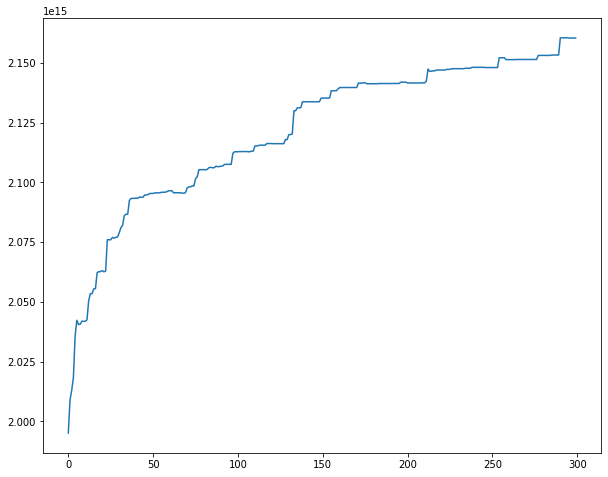

In [17]:
file = 'moead-reduced-pareto-execution-'
folder = 'MOEAD_R8'
hv_moead_agr_R8R3, hv_moead_agr_R8R3_df = mt.plot_hypervolume_convergence_reduced(folder, file, 2)

## Convergência do HV em $\mathbb{R}^3$ para MOEAD com escolha

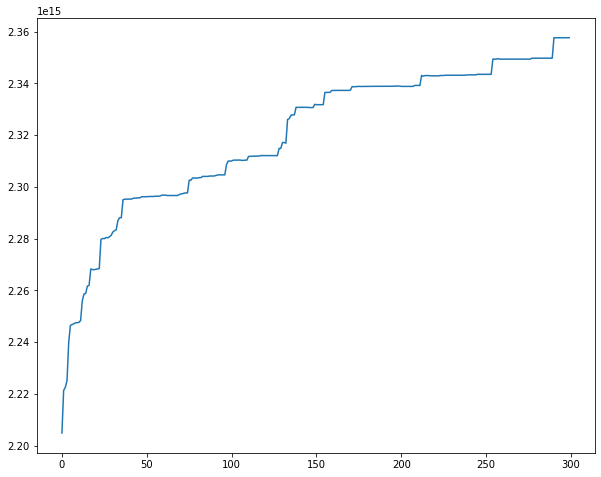

In [18]:
file = 'moead-reduced-pareto-execution-'
folder = 'MOEAD_R8'
hv_moead_esc_R8R3, hv_moead_esc_R8R3_df = mt.plot_hypervolume_convergence_reduced(folder, file, 1)

## Paretos combinados em $\mathbb{R}^3$

### Leitura dos Paretos Combinados

In [24]:
combined_pareto_moead_agr_path = '/home/renansantos/Área de Trabalho/Doutorado' +\
                           '/PhD_2019_01/PhD_2019_01/Results_2020/MOEAD/MOEAD_R3_CA/'
combined_pareto_moead_esc_path = '/home/renansantos/Área de Trabalho/Doutorado' +\
                           '/PhD_2019_01/PhD_2019_01/Results_2020/MOEAD/MOEAD_R3_SA/'
combined_pareto_moead_path = '/home/renansantos/Área de Trabalho/Doutorado' +\
                           '/PhD_2019_01/PhD_2019_01/Results_2020/MOEAD/MOEAD_R8/'

combined_pareto_moead_agr = mt.get_combined_pareto(combined_pareto_moead_agr_path)
combined_pareto_moead_esc = mt.get_combined_pareto(combined_pareto_moead_esc_path)
combined_pareto_moead_agr_projected = mt.get_combined_pareto_moead_agr(combined_pareto_moead_path)
combined_pareto_moead_esc_projected = mt.get_combined_pareto_moead_esc(combined_pareto_moead_path)

### MOEAD com agregação e MOEAD - Plot em $\mathbb{R}^3$

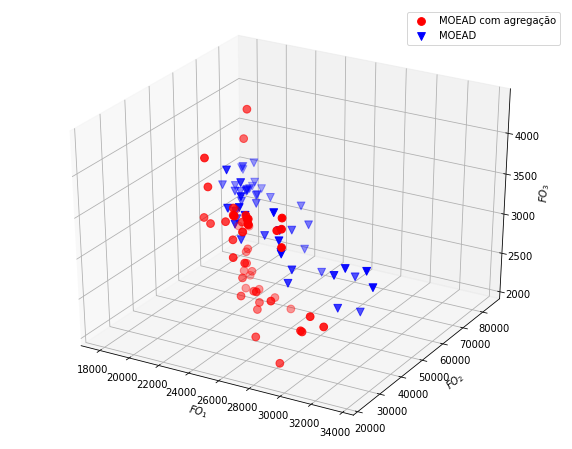

In [22]:
mt.plot_combined_pareto(combined_pareto_moead_agr,
                        combined_pareto_moead_agr_projected,
                        'MOEAD com agregação',
                        'MOEAD')

### MOEAD com escolha e MOEAD - Plot em $\mathbb{R}^3$

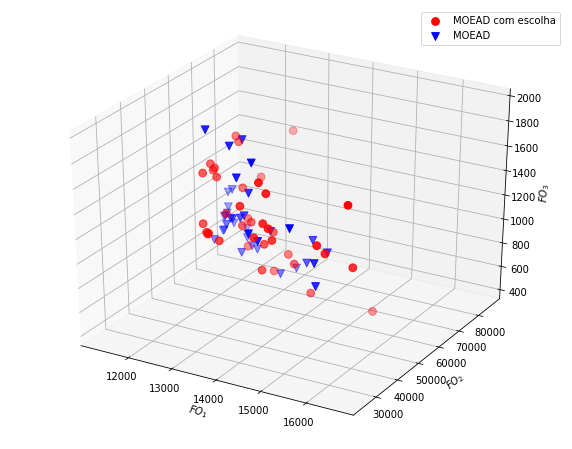

In [25]:
mt.plot_combined_pareto(combined_pareto_moead_esc,
                        combined_pareto_moead_esc_projected,
                        'MOEAD com escolha',
                        'MOEAD')

## Boxplots para o Hipervolume em $\mathbb{R}^3$

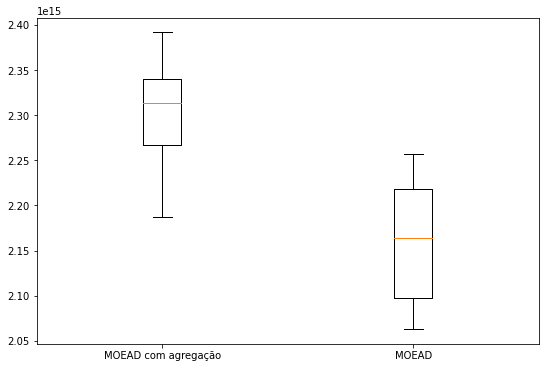

In [26]:
data_to_plot = [hv_moead_agr_R3_df.iloc[299:].values.tolist()[0],
                hv_moead_agr_R8R3_df.iloc[299:].values.tolist()[0]]
plt.figure(figsize=(9, 6))
plt.boxplot(data_to_plot, labels=["MOEAD com agregação","MOEAD"])
plt.show()

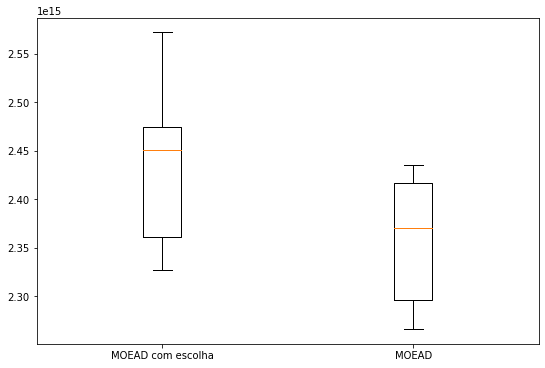

In [27]:
data_to_plot = [hv_moead_esc_R3_df.iloc[299:].values.tolist()[0],
                hv_moead_esc_R8R3_df.iloc[299:].values.tolist()[0]]
plt.figure(figsize=(9, 6))
plt.boxplot(data_to_plot, labels=["MOEAD com escolha","MOEAD"])
plt.show()

## Teste de Aleatoriedade

### MOEAD com agregação X MOEAD

In [28]:
mt.random_test(hv_moead_agr_R3_df.iloc[299:], hv_moead_agr_R8R3_df.iloc[299:], 10, False)

H1-
Limiar = 78065592891362.2
z = -3.4930823854378654
Mean Spread Diff -139925267402816.0


### MOEAD com escolha X MOEAD

In [29]:
mt.random_test(hv_moead_esc_R3_df.iloc[299:], hv_moead_esc_R8R3_df.iloc[299:], 10, False)

H0
Limiar = 95539602386992.83
z = -1.4886914071156883
Mean Spread Diff -72934682034900.0
